## Sales Product Data

Sales analytics is the practice of generating insights from sales data, trends, and metrics to set targets and forecast future sales performance. Sales analysis is mining your data to evaluate the performance of your sales team against its goals. It provides insights about the top performing and underperforming products/services, the problems in selling and market opportunities, sales forecasting, and sales activities that generate revenue.

## Content
- Order ID - An Order ID is the number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.
- Product - The product that have been sold.
- Quantity Ordered - Ordered Quantity is the total item quantity ordered in the initial order (without any changes).
- Price Each - The price of each products.
- Order Date - This is the date the customer is requesting the order be shipped.
- Purchase Address - The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a shipping date; billing address; shipping address; and the request items, quantities and price.

## Task:
- What was the best Year for sales? How much was earned that Year?
- What was the best month for sales? How much was earned that month?
- What City had the highest number of sales?
- What time should we display adverstisement to maximize likelihood of customer's buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?

In [1]:
# import libraries for analysis
import pandas as pd
import os

In [2]:
# load dataset
df = pd.read_csv('all_data.csv')

# display the first 5 rows in dataset
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


## DATA CLEANING

In [3]:
# create a table of missing values from our dataset
nan_df = df[df.isna().any(axis = 1)]

# display this table
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185175,NaN,NaN,NaN,NaN,NaN,NaN
185437,NaN,NaN,NaN,NaN,NaN,NaN
186041,NaN,NaN,NaN,NaN,NaN,NaN
186547,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# drop all missing values in this table
df = df.dropna(how='all')

# confirm
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016"


In [5]:
# find the first two string that isnt 'Or' from ORDER DATE column and reassign to dataset
df = df[df['Order Date'].str[0:2] != 'Or']

In [6]:
# change datatype of QUANTITY ORDERED column to numeric/interger
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
# change datatype of PRICE EACH column to numerical value 
df['Price Each'] = pd.to_numeric(df['Price Each'])

C:\Users\User\AppData\Local\Temp\ipykernel_14956\3176252998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
C:\Users\User\AppData\Local\Temp\ipykernel_14956\3176252998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'])


In [7]:

df['Sales'] = df['Quantity Ordered']* df['Price Each']

df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_14956\561814804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity Ordered']* df['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",11.99


In [8]:
# define a function that returns the first string separated by '/'
def get_month(date):
    return date.split('/')[0]

# create a new MONTH column from ORDER DATE that applies this function 
df['Month'] = df['Order Date'].apply(lambda x: get_month(x))

#change HOUR datatype to interger
df['Month'] = df['Month'].astype(int)

# confirm
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_14956\554870020.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order Date'].apply(lambda x: get_month(x))
C:\Users\User\AppData\Local\Temp\ipykernel_14956\554870020.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Month'].astype(int)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",23.90,4
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",11.99,4


In [9]:
# define a function that returns the third string separated by '/'
def get_year(date):
    return date.split('/')[2].split(' ')[0]

# create a new YEAR column from ORDER DATE that applies this function 
df['Year'] = df['Order Date'].apply(lambda x: get_year(x))

#change HOUR datatype to interger
df['Year'] = df['Year'].astype(int)

# confirm
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_14956\3414865180.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Order Date'].apply(lambda x: get_year(x))
C:\Users\User\AppData\Local\Temp\ipykernel_14956\3414865180.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Year
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",23.90,4,2019
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,2019
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,2019
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,2019
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",11.99,4,2019


In [10]:
# define a function that returns the second string separated by ' ' then split to get the first string
# separated by ':'
def get_hour(time):
    return time.split(' ')[1].split(':')[0]

# create a new HOUR column from ORDER DATE that applies this function 
df['Hour'] = df['Order Date'].apply(lambda x: get_hour(x))

#change HOUR datatype to interger
df['Hour'] = df['Hour'].astype(int)

# confirm
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_14956\4214332132.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Order Date'].apply(lambda x: get_hour(x))
C:\Users\User\AppData\Local\Temp\ipykernel_14956\4214332132.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Hour'].astype(int)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Year,Hour
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",23.90,4,2019,8
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,2019,22
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,2019,14
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,2019,14
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",11.99,4,2019,9


In [11]:
# define a function which returns the second string separated by ','
def get_city(address):
    return address.split(',')[1]

# define a function which returns the third string separated by ','
# and split the separated value to get the second string separated by ' '
def get_state(address):
    return address.split(',')[2].split(' ')[1]

# create a new CITY column from PURCHASE ADDRESS that apply these functions
#(with a blank space between them)
df['City'] = df['Purchase Address'].apply(lambda x: get_city(x) + ' '+ get_state(x))

# confirm
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_14956\3092396198.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['Purchase Address'].apply(lambda x: get_city(x) + ' '+ get_state(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Year,Hour,City
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",23.90,4,2019,8,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,2019,22,Boston MA
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,2019,14,Los Angeles CA
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,2019,14,Los Angeles CA
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",11.99,4,2019,9,Los Angeles CA


In [12]:
df.to_csv('sales anaysis.csv', index=False)

## EXPLORATORY DATA ANALYSIS 

In [13]:
import matplotlib.pyplot as plt

In [14]:
results = df.groupby('Month').sum()

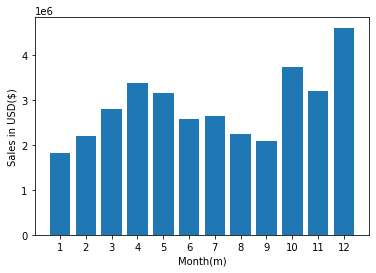

In [15]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Month(m)')
plt.ylabel('Sales in USD($)')
plt.show()


In [16]:
results = df.groupby('Year')['Sales'].sum()
results

Year
2019    34483365.68
2020        8670.29
Name: Sales, dtype: float64

In [17]:
results = df.groupby('City').sum()
results

,Quantity Ordered,Price Each,Sales,Month,Year,Hour
City,,,,,,
Atlanta GA,16602,2779908.20,2795498.58,104794,30044739,214264
Austin TX,11153,1809873.61,1819581.75,69829,19998197,141946
Boston MA,22528,3637409.77,3661642.01,141112,40246750,288225
Dallas TX,16730,2752627.82,2767975.40,104620,29921582,214390
Los Angeles CA,33289,5421435.23,5452570.80,208325,59772496,427444
New York City NY,27932,4635370.83,4664317.43,175741,50224654,357696
Portland ME,2750,447189.25,449758.27,17144,4956645,35211
Portland OR,11303,1860558.22,1870732.34,70621,20210192,144421
San Francisco CA,50239,8211461.74,8262203.91,315520,90313920,643265


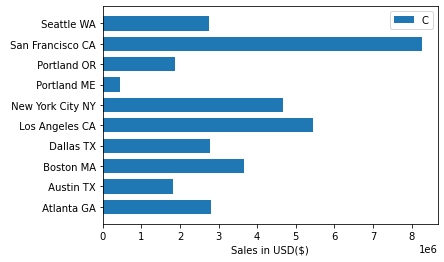

In [18]:
cities = [city for city, df in df.groupby('City')]

plt.barh(cities, results['Sales'], height=.7)
plt.xlabel('Sales in USD($)')
plt.legend('City Name')
plt.show()

In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\User\AppData\Local\Temp\ipykernel_14956\3072535395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [20]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute

df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_14956\1405961022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Order Date'].dt.hour
C:\Users\User\AppData\Local\Temp\ipykernel_14956\1405961022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minute'] = df['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Year,Hour,City,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,2019,8,Dallas TX,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,2019,22,Boston MA,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,2019,14,Los Angeles CA,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,2019,14,Los Angeles CA,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,2019,9,Los Angeles CA,27


In [21]:
results = df.groupby(['Hour']).sum()
results

,Quantity Ordered,Price Each,Sales,Month,Year,Minute
Hour,,,,,,
0,4428,709296.70,713721.27,27554,7894302,103596
1,2619,458490.00,460866.88,16657,4744659,61807
2,1398,233833.64,234851.44,8507,2509621,32508
3,928,144726.42,145757.89,5904,1677792,23044
4,937,162058.18,162661.01,6148,1724230,26876
5,1493,229621.21,230679.82,9301,2667101,42877
6,2810,445000.11,448113.00,17539,5011158,80343
7,4556,740568.11,744854.12,28850,8098209,127447
8,7002,1185970.62,1192348.97,43626,12630864,198135


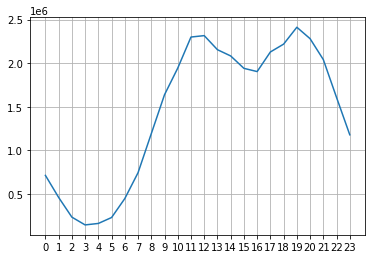

In [22]:
hours = [hour for hour, df in df.groupby('Hour')]

plt.plot(hours, results['Sales'])
plt.xticks(hours)
plt.grid()
plt.show()

According to our data, 12:00pm and 19:00pm are the time we sold the most products

In [23]:
results = df.groupby('Hour').sum()
results

,Quantity Ordered,Price Each,Sales,Month,Year,Minute
Hour,,,,,,
0,4428,709296.70,713721.27,27554,7894302,103596
1,2619,458490.00,460866.88,16657,4744659,61807
2,1398,233833.64,234851.44,8507,2509621,32508
3,928,144726.42,145757.89,5904,1677792,23044
4,937,162058.18,162661.01,6148,1724230,26876
5,1493,229621.21,230679.82,9301,2667101,42877
6,2810,445000.11,448113.00,17539,5011158,80343
7,4556,740568.11,744854.12,28850,8098209,127447
8,7002,1185970.62,1192348.97,43626,12630864,198135


In [24]:
results = df.loc[df['Hour'] >= 0]
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Year,Hour,City,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,2019,8,Dallas TX,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,2019,22,Boston MA,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,2019,14,Los Angeles CA,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,2019,14,Los Angeles CA,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,2019,9,Los Angeles CA,27
...,...,...,...,...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,9,2019,20,Los Angeles CA,56
186845,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,2019,16,San Francisco CA,0
186846,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,9,2019,7,San Francisco CA,39
186847,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,9,2019,17,San Francisco CA,30


In [25]:
df['count'] = 1
results = df.groupby(['Product']).sum()
results

C:\Users\User\AppData\Local\Temp\ipykernel_14956\1323550263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count'] = 1


,Quantity Ordered,Price Each,Sales,Month,Year,Hour,Minute,count
Product,,,,,,,,
20in Monitor,4129,451068.99,454148.71,29336,8279921,58764,122252,4101
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,44440,12578371,90916,184331,6230
27in FHD Monitor,7550,1125974.93,1132424.50,52558,15156636,107540,219948,7507
34in Ultrawide Monitor,6199,2348718.19,2355558.01,43304,12479439,89076,183480,6181
AA Batteries (4-pack),27635,79015.68,106118.40,145558,41544963,298342,609039,20577
AAA Batteries (4-pack),31017,61716.59,92740.83,146370,41674182,297332,612113,20641
Apple Airpods Headphones,15661,2332350.00,2349150.00,109477,31393435,223304,455570,15549
Bose SoundSport Headphones,13457,1332366.75,1345565.43,94113,26903178,192445,392603,13325
Flatscreen TV,4819,1440000.00,1445700.00,34224,9691201,68815,142789,4800


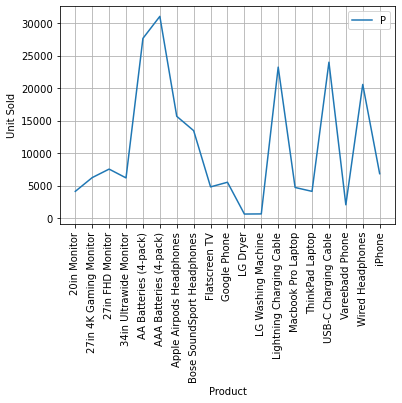

In [26]:
Products = [Product for Product, df in df.groupby('Product')]

plt.plot(Products, results['Quantity Ordered'])
plt.xticks(Products, rotation = 'vertical')
plt.ylabel('Unit Sold')
plt.xlabel('Product')
plt.legend('Product')
plt.grid()
plt.show()

According to our data, AAA Batteries(4-Pack) made the most order

In [27]:
df.groupby('Order ID').sum()

,Quantity Ordered,Price Each,Sales,Month,Year,Hour,Minute,count
Order ID,,,,,,,,
141234,1,700.00,700.00,1,2019,21,25,1
141235,1,14.95,14.95,1,2019,14,15,1
141236,2,11.99,23.98,1,2019,13,33,1
141237,1,149.99,149.99,1,2019,20,33,1
141238,1,11.99,11.99,1,2019,11,59,1
...,...,...,...,...,...,...,...,...
319666,1,14.95,14.95,12,2019,20,58,1
319667,2,3.84,7.68,12,2019,12,1,1
319668,1,400.00,400.00,12,2019,6,43,1


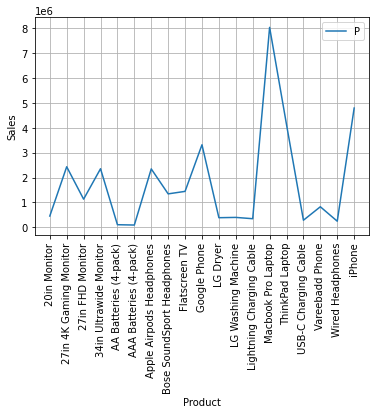

In [28]:
Products = [Product for Product, df in df.groupby('Product')]

plt.plot(Products, results['Sales'])
plt.xticks(Products, rotation = 'vertical')
plt.ylabel('Sales')
plt.xlabel('Product')
plt.legend('Product')
plt.grid()
plt.show()

WHAT PRODUCT ARE OFTEN SOLD TOGETHER?

In [29]:
edf = df[df['Order Date'].duplicated(keep=False)]

edf['Grouped'] = edf.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

edf = edf[['Order ID','Grouped']].drop_duplicates()

edf.head()

C:\Users\User\AppData\Local\Temp\ipykernel_14956\1580415417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edf['Grouped'] = edf.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
0,176558,USB-C Charging Cable
1,176559,Bose SoundSport Headphones
2,176560,"Google Phone,Wired Headphones"
4,176561,Wired Headphones
5,176562,USB-C Charging Cable


In [30]:
from itertools import combinations
from collections import Counter

In [31]:
count = Counter()

for row in edf['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
